In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import pandas as pd
import os
import numpy as np
from PIL import Image

In [ ]:
# Load the train, validation and test files
train_df = pd.read_csv('/content/drive/MyDrive/TransferLearning/train/_classes.csv')
test_df = pd.read_csv('/content/drive/MyDrive/TransferLearning/test/_classes.csv')
val_df = pd.read_csv('/content/drive/MyDrive/TransferLearning/valid/_classes.csv')

train_dir = '/content/drive/MyDrive/TransferLearning/train'
test_dir = '/content/drive/MyDrive/TransferLearning/test'
val_dir = '/content/drive/MyDrive/TransferLearning/valid'

train_df['filepath'] = train_df['filename'].apply(lambda x: os.path.join(train_dir, x))
test_df['filepath'] = test_df['filename'].apply(lambda x: os.path.join(test_dir, x))
val_df['filepath'] = val_df['filename'].apply(lambda x: os.path.join(val_dir, x))

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import pandas as pd

# Loading images and labels
image_size = (224, 224)

def load_images_and_labels(df):
    images = []
    labels = []
    for _, row in df.iterrows():
        img = load_img(row['filepath'], target_size=image_size)
        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
        images.append(img_array)

        # Extracting labels
        labels.append([row[' dog'], row[' person']])

    return np.array(images), np.array(labels)

# Loading training and validation images
train_images, train_labels = load_images_and_labels(train_df)
valid_images, valid_labels = load_images_and_labels(val_df)
test_images, test_labels = load_images_and_labels(test_df)


print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", valid_images.shape)
print("Validation labels shape:", valid_labels.shape)

Test images shape: (20, 224, 224, 3)
Test labels shape: (20, 2)
Train images shape: (142, 224, 224, 3)
Train labels shape: (142, 2)
Validation images shape: (41, 224, 224, 3)
Validation labels shape: (41, 2)


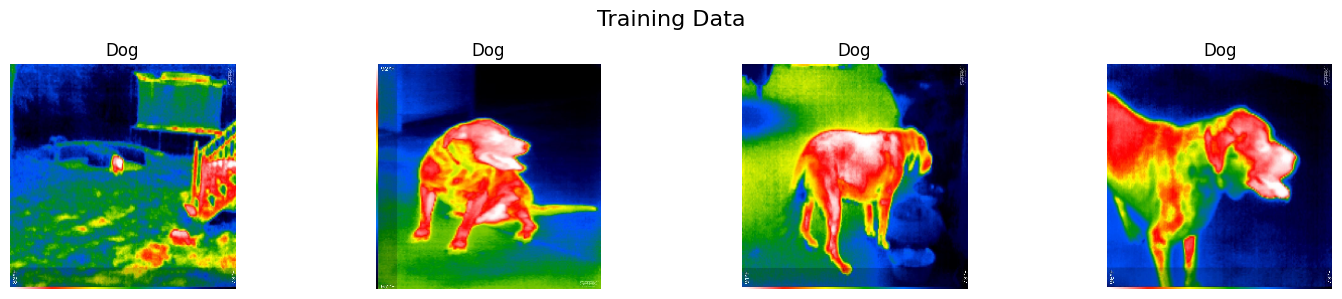

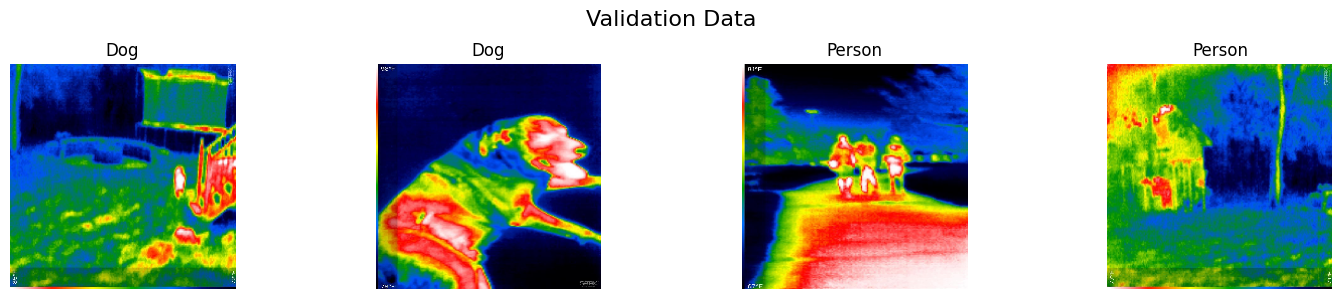

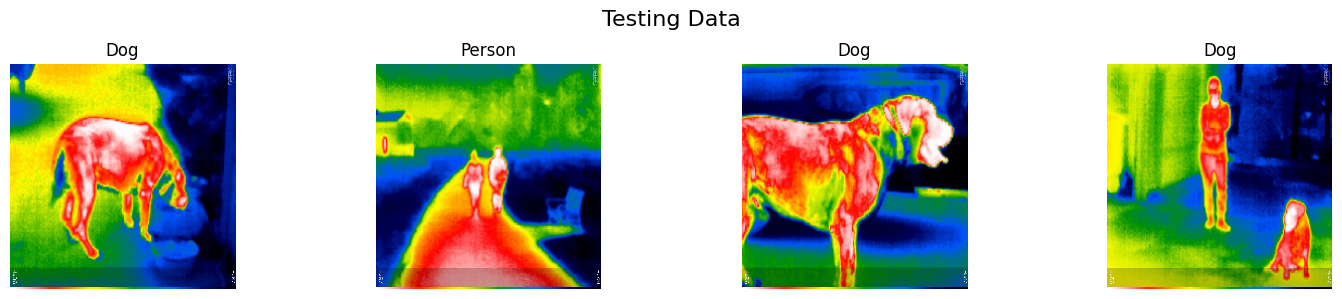

In [ ]:
# Plotting dataset with images and labels
import matplotlib.pyplot as plt

def plot_sample_data(images, labels, title, num_samples=4):
    plt.figure(figsize=(15, 3))
    plt.suptitle(title, fontsize=16)

    for i in range(min(num_samples, len(images))):
        ax = plt.subplot(1, num_samples, i + 1)
        ax.imshow(images[i])
        label_text = "Dog" if labels[i][0] == 1 else "Person"
        ax.set_title(label_text)
        ax.axis("off")

    plt.tight_layout()
    plt.subplots_adjust(top=0.8)


plot_sample_data(train_images, train_labels, "Training Data")
plot_sample_data(valid_images, valid_labels, "Validation Data")
plot_sample_data(test_images, test_labels, "Testing Data")

plt.show()

# CNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# CNN model
def create_cnn_model(input_shape=(224, 224, 3)):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(2, activation='sigmoid')
    ])

    return model

# Creating CNN model
cnn_model = create_cnn_model()
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(
    train_images, train_labels,
    validation_data=(valid_images, valid_labels),
    epochs=10,
    batch_size=32
)

Epoch 1/10
5/5 [==============================] - 3s 453ms/step - loss: 0.6893 - accuracy: 0.5634 - val_loss: 0.6324 - val_accuracy: 0.6585
Epoch 2/10
5/5 [==============================] - 2s 396ms/step - loss: 0.5685 - accuracy: 0.7183 - val_loss: 0.4449 - val_accuracy: 0.7073
Epoch 3/10
5/5 [==============================] - 2s 401ms/step - loss: 0.4044 - accuracy: 0.7676 - val_loss: 0.4098 - val_accuracy: 0.8293
Epoch 4/10
5/5 [==============================] - 2s 396ms/step - loss: 0.3342 - accuracy: 0.7817 - val_loss: 0.3735 - val_accuracy: 0.8537
Epoch 5/10
5/5 [==============================] - 2s 394ms/step - loss: 0.2684 - accuracy: 0.8592 - val_loss: 0.6156 - val_accuracy: 0.7805
Epoch 6/10
5/5 [==============================] - 2s 390ms/step - loss: 0.2471 - accuracy: 0.8451 - val_loss: 0.4002 - val_accuracy: 0.7805
Epoch 7/10
5/5 [==============================] - 2s 419ms/step - loss: 0.2133 - accuracy: 0.8451 - val_loss: 0.5326 - val_accuracy: 0.7805
Epoch 8/10
5/5 [====

In [ ]:
# Model Evaluation
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 91ms/step - loss: 0.5042 - accuracy: 0.6000
Test Loss: 0.5041699409484863
Test Accuracy: 0.6000000238418579


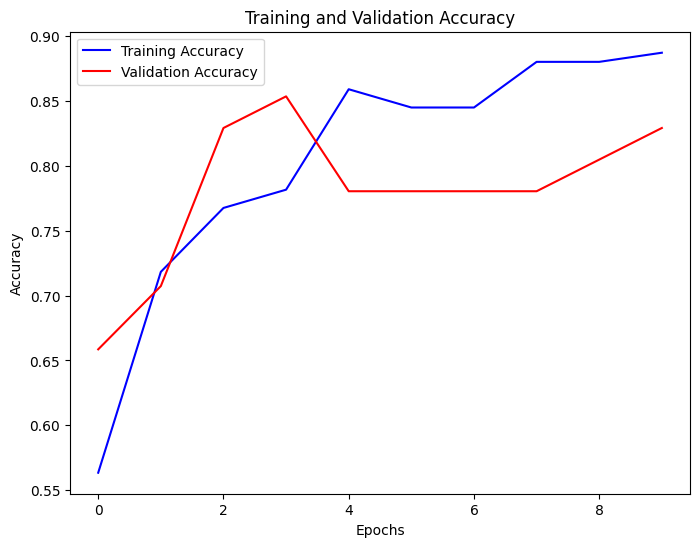

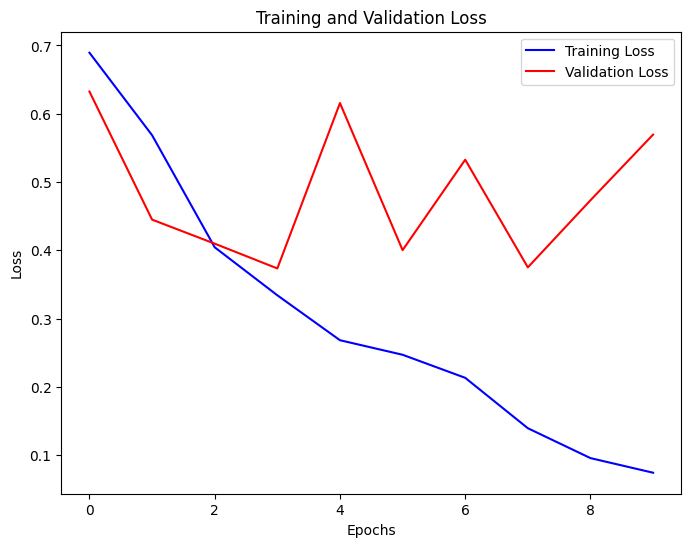

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'b-', label='Training Loss')
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# AlexNet Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_alexnet_model(input_shape=(224, 224, 3)):
    model = models.Sequential([
        # First Convolutional Layer
        layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),

        # Second Convolutional Layer
        layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),

        # Third Convolutional Layer
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),

        # Fourth Convolutional Layer
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),

        # Fifth Convolutional Layer
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Flatten(),

        # First Fully Connected Layer
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        # Second Fully Connected Layer
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        # Output Layer
        layers.Dense(2, activation='sigmoid')
    ])
    return model

# Creating the model
alexnet_model = create_alexnet_model()
alexnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 54, 54, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 26, 26, 256)       1024      
 chNormalization)                                                
                                                      

In [ ]:
alexnet_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [ ]:
history = alexnet_model.fit(
    train_images, train_labels,
    validation_data=(valid_images, valid_labels),
    epochs=10,
    batch_size=32
)

Epoch 1/10
5/5 [==============================] - 5s 621ms/step - loss: 12.2712 - accuracy: 0.5282 - val_loss: 0.6940 - val_accuracy: 0.7073
Epoch 2/10
5/5 [==============================] - 2s 480ms/step - loss: 0.6853 - accuracy: 0.6690 - val_loss: 0.6955 - val_accuracy: 0.6585
Epoch 3/10
5/5 [==============================] - 2s 465ms/step - loss: 0.7732 - accuracy: 0.6338 - val_loss: 0.6706 - val_accuracy: 0.6585
Epoch 4/10
5/5 [==============================] - 2s 483ms/step - loss: 0.6332 - accuracy: 0.6620 - val_loss: 0.6946 - val_accuracy: 0.3415
Epoch 5/10
5/5 [==============================] - 2s 478ms/step - loss: 0.6034 - accuracy: 0.7535 - val_loss: 0.6929 - val_accuracy: 0.3902
Epoch 6/10
5/5 [==============================] - 2s 460ms/step - loss: 0.5850 - accuracy: 0.7817 - val_loss: 0.7109 - val_accuracy: 0.3415
Epoch 7/10
5/5 [==============================] - 2s 457ms/step - loss: 0.5275 - accuracy: 0.8169 - val_loss: 0.7383 - val_accuracy: 0.3415
Epoch 8/10
5/5 [===

In [ ]:
# Model EValuation
test_loss, test_accuracy = alexnet_model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 74ms/step - loss: 0.8552 - accuracy: 0.3500
Test Loss: 0.8551942706108093
Test Accuracy: 0.3499999940395355


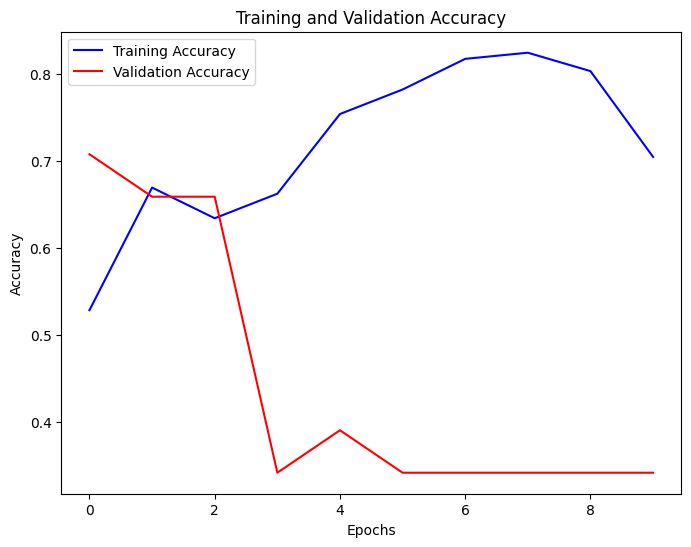

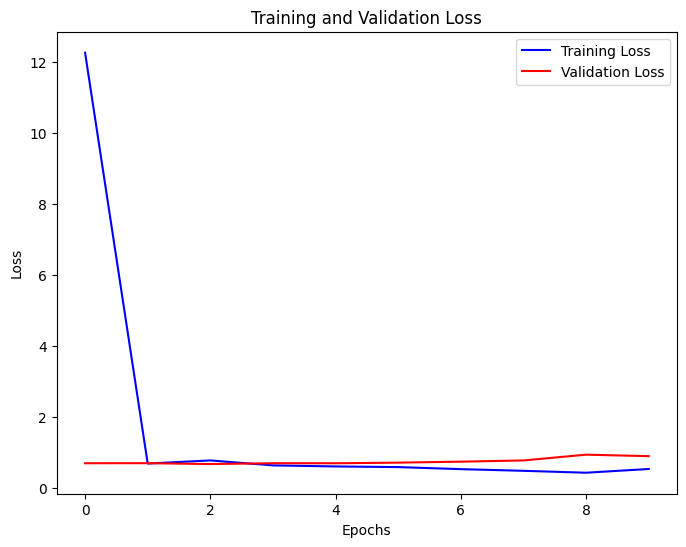

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'b-', label='Training Loss')
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# VGG-16 Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import VGG16

def pretrained_vgg16(input_shape=(224, 224, 3), num_classes=2):
    # Loading pre-trained VGG16 model
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    # Freeze the base model
    base_model.trainable = False

    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dense(4096, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)  # Use 'softmax' for multi-class classification
    model = Model(inputs=base_model.input, outputs=outputs)

    return model

# Creating model
vgg16_model = pretrained_vgg16(input_shape=(224, 224, 3), num_classes=2)

# Compiling the model
vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
vgg16_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
history = vgg16_model.fit(
    train_images, train_labels,
    validation_data=(valid_images, valid_labels),
    epochs=10,
    batch_size=32
)

Epoch 1/10
5/5 [==============================] - 7s 1s/step - loss: 11.7412 - accuracy: 0.5845 - val_loss: 0.8976 - val_accuracy: 0.5122
Epoch 2/10
5/5 [==============================] - 6s 1s/step - loss: 0.8327 - accuracy: 0.6761 - val_loss: 0.3212 - val_accuracy: 0.7561
Epoch 3/10
5/5 [==============================] - 6s 1s/step - loss: 0.2365 - accuracy: 0.8521 - val_loss: 0.1744 - val_accuracy: 0.9268
Epoch 4/10
5/5 [==============================] - 6s 1s/step - loss: 0.1151 - accuracy: 0.8099 - val_loss: 0.1128 - val_accuracy: 0.8537
Epoch 5/10
5/5 [==============================] - 6s 1s/step - loss: 0.0241 - accuracy: 0.8521 - val_loss: 0.0995 - val_accuracy: 0.8537
Epoch 6/10
5/5 [==============================] - 6s 1s/step - loss: 0.0138 - accuracy: 0.9014 - val_loss: 0.0985 - val_accuracy: 0.9024
Epoch 7/10
5/5 [==============================] - 6s 1s/step - loss: 0.0096 - accuracy: 0.8803 - val_loss: 0.0885 - val_accuracy: 0.8537
Epoch 8/10
5/5 [========================

In [ ]:
# Model Evaluation
test_loss, test_accuracy = vgg16_model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 411ms/step - loss: 0.7755 - accuracy: 0.6500
Test Loss: 0.7754645347595215
Test Accuracy: 0.6499999761581421


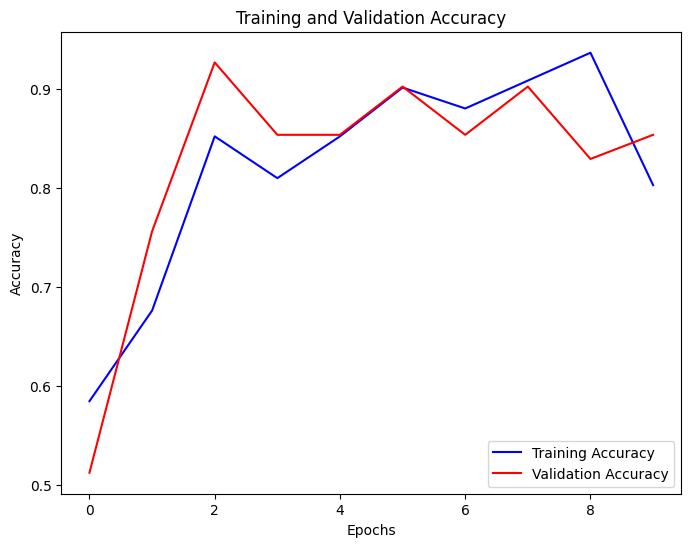

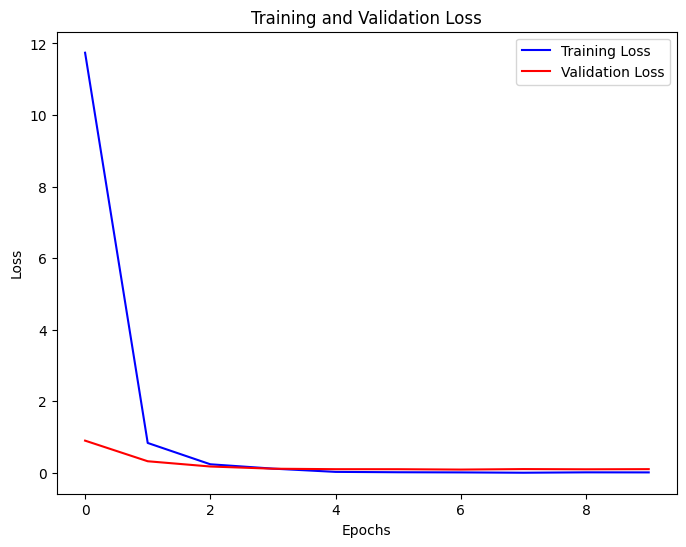

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'b-', label='Training Loss')
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Data Augmentation

In [ ]:
import tensorflow as tf
import numpy as np
import cv2

def flip_image(image):
    return tf.image.random_flip_left_right(image)

def rotate_image(image):
    angle = np.random.uniform(-15, 15)
    image = tf.keras.preprocessing.image.img_to_array(image)
    return tf.image.rot90(image, k=np.random.choice([0, 1, 2, 3]))

def zoom_image(image, zoom_range=(0.8, 1.2)):
    if isinstance(image, tf.Tensor):
        image = image.numpy()

    zoom = np.random.uniform(zoom_range[0], zoom_range[1])
    height, width = image.shape[:2]
    new_height, new_width = int(height * zoom), int(width * zoom)
    image = cv2.resize(image, (new_width, new_height))

    pad_height = (height - new_height) // 2 if zoom < 1.0 else 0
    pad_width = (width - new_width) // 2 if zoom < 1.0 else 0
    image = cv2.copyMakeBorder(image, pad_height, pad_height, pad_width, pad_width, cv2.BORDER_REFLECT) if zoom < 1.0 else image

    crop_height = (new_height - height) // 2 if zoom >= 1.0 else 0
    crop_width = (new_width - width) // 2 if zoom >= 1.0 else 0
    image = image[crop_height:crop_height+height, crop_width:crop_width+width] if zoom >= 1.0 else image

    return tf.convert_to_tensor(image)

def shift_image(image, width_shift_range=0.2, height_shift_range=0.2):
    if isinstance(image, tf.Tensor):
        image = image.numpy()

    height, width = image.shape[:2]
    tx = np.random.uniform(-height_shift_range, height_shift_range) * height
    ty = np.random.uniform(-width_shift_range, width_shift_range) * width
    M = np.float32([[1, 0, ty], [0, 1, tx]])

    return tf.convert_to_tensor(cv2.warpAffine(image, M, (width, height), borderMode=cv2.BORDER_REFLECT))

def resize_image(image):
    return cv2.resize(image, (224, 224))

def augment_single_image(image):
    image = resize_image(image)
    image = flip_image(image)
    image = rotate_image(image)
    image = zoom_image(image)
    image = shift_image(image)
    return np.array(tf.image.resize_with_crop_or_pad(image, 224, 224), dtype=np.float32)

augmented_train_images = np.array([augment_single_image(img) for img in train_images])
combined_train_images = np.concatenate([train_images, augmented_train_images], axis=0)
combined_train_labels = np.concatenate([train_labels, train_labels], axis=0)
print(combined_train_images.shape)

(284, 224, 224, 3)


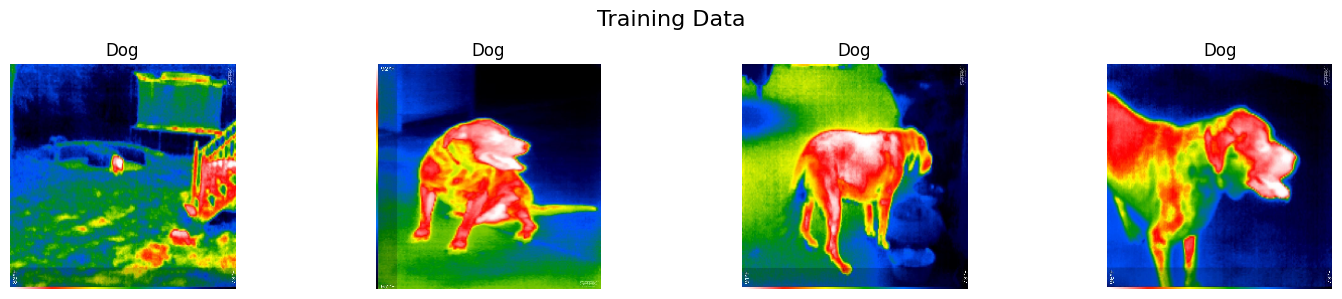

In [ ]:
# Samples for augmented training dataset
plot_sample_data(combined_train_images, combined_train_labels, "Training Data")

#CNN Tuned

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam, SGD
import itertools
import matplotlib.pyplot as plt

# Creating and compiling CNN model
def create_cnn_model(input_shape=(224, 224, 3),
                     learning_rate=0.001,
                     dropout_rate=0.5,
                     l2_regularization=0.01,
                     optimizer='adam'):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape,
                      kernel_regularizer=regularizers.l2(l2_regularization)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(l2_regularization)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(l2_regularization)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(l2_regularization)),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu',
                     kernel_regularizer=regularizers.l2(l2_regularization)),
        layers.Dropout(dropout_rate),
        layers.Dense(2, activation='sigmoid')
    ])

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter values
learning_rates = [1e-5, 1e-3]
dropout_rates = [0.3, 0.5]
l2_regs = [0.0001, 0.001]
optimizers = ['adam', 'sgd']

best_accuracy = 0
best_model = None
best_params = None
best_history = None

for lr, dr, l2, opt in itertools.product(learning_rates, dropout_rates, l2_regs, optimizers):
    print(f"Training with: learning_rate={lr}, dropout_rate={dr}, l2_reg={l2}, optimizer={opt}")
    model = create_cnn_model(
        learning_rate=lr,
        dropout_rate=dr,
        l2_regularization=l2,
        optimizer=opt
    )

    # Training the model
    history = model.fit(
        combined_train_images, combined_train_labels,
        epochs=5,
        validation_data=(valid_images, valid_labels),
        verbose=0
    )

    # Getting the best validation accuracy for this model
    val_accuracy = max(history.history['val_accuracy'])

    # Updating best validation accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model = model
        best_params = (lr, dr, l2, opt)
        best_history = history

print(f"Best accuracy: {best_accuracy}")
print(f"Best parameters: learning_rate={best_params[0]}, dropout_rate={best_params[1]}, l2_reg={best_params[2]}, optimizer={best_params[3]}")

Training with: learning_rate=1e-05, dropout_rate=0.3, l2_reg=0.0001, optimizer=adam
Training with: learning_rate=1e-05, dropout_rate=0.3, l2_reg=0.0001, optimizer=sgd
Training with: learning_rate=1e-05, dropout_rate=0.3, l2_reg=0.001, optimizer=adam
Training with: learning_rate=1e-05, dropout_rate=0.3, l2_reg=0.001, optimizer=sgd
Training with: learning_rate=1e-05, dropout_rate=0.5, l2_reg=0.0001, optimizer=adam
Training with: learning_rate=1e-05, dropout_rate=0.5, l2_reg=0.0001, optimizer=sgd
Training with: learning_rate=1e-05, dropout_rate=0.5, l2_reg=0.001, optimizer=adam
Training with: learning_rate=1e-05, dropout_rate=0.5, l2_reg=0.001, optimizer=sgd
Training with: learning_rate=0.001, dropout_rate=0.3, l2_reg=0.0001, optimizer=adam
Training with: learning_rate=0.001, dropout_rate=0.3, l2_reg=0.0001, optimizer=sgd
Training with: learning_rate=0.001, dropout_rate=0.3, l2_reg=0.001, optimizer=adam
Training with: learning_rate=0.001, dropout_rate=0.3, l2_reg=0.001, optimizer=sgd
Trai

In [ ]:
# Model Evaluation
test_loss, test_accuracy = best_model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 87ms/step - loss: 0.4480 - accuracy: 0.6000
Test Loss: 0.4479731619358063
Test Accuracy: 0.6000000238418579


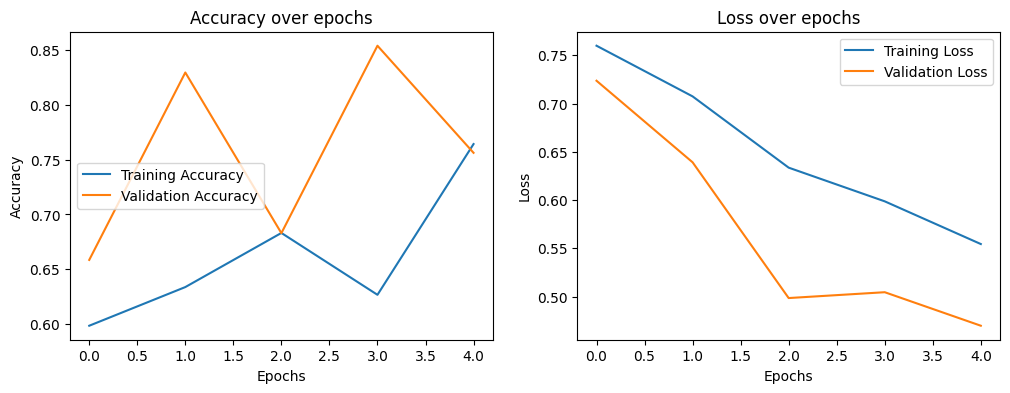

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## AlexNet Tuned

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2
import itertools
import matplotlib.pyplot as plt

# Creating an AlexNet model
def create_alexnet_model(input_shape=(224, 224, 3),
                         l2_regularizer=0.0001,
                         dropout_rate=0.5,
                         optimizer_type='adam',
                         learning_rate=1e-3):
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape,
                      kernel_regularizer=l2(l2_regularizer)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Conv2D(256, (5, 5), padding='same', activation='relu',
                      kernel_regularizer=l2(l2_regularizer)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Conv2D(384, (3, 3), padding='same', activation='relu',
                      kernel_regularizer=l2(l2_regularizer)),

        layers.Conv2D(384, (3, 3), padding='same', activation='relu',
                      kernel_regularizer=l2(l2_regularizer)),

        layers.Conv2D(256, (3, 3), padding='same', activation='relu',
                      kernel_regularizer=l2(l2_regularizer)),
        layers.MaxPooling2D((3, 3), strides=2),

        layers.Flatten(),

        layers.Dense(4096, activation='relu', kernel_regularizer=l2(l2_regularizer)),
        layers.Dropout(dropout_rate),

        layers.Dense(4096, activation='relu', kernel_regularizer=l2(l2_regularizer)),
        layers.Dropout(dropout_rate),

        layers.Dense(2, activation='sigmoid')
    ])

    if optimizer_type == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_type == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Defining hyperparameters
learning_rates = [1e-5, 1e-3]
dropout_rates = [0.3, 0.5]
l2_regs = [0.0001, 0.001]
optimizers = ['adam', 'sgd']

best_accuracy = 0
best_model = None
best_params = None
best_history = None

for l2_reg, dropout_rate, learning_rate, optimizer_type in itertools.product(l2_regs, dropout_rates, learning_rates, optimizers):
    print(f"Training with: l2_reg={l2_reg}, dropout_rate={dropout_rate}, learning_rate={learning_rate}, optimizer={optimizer_type}")

    model = create_alexnet_model(
        l2_regularizer=l2_reg,
        dropout_rate=dropout_rate,
        optimizer_type=optimizer_type,
        learning_rate=learning_rate
    )

    # Training the model
    history = model.fit(
        combined_train_images, combined_train_labels,
        epochs=5,
        validation_data=(valid_images, valid_labels),
        verbose=0
    )

    val_accuracy = max(history.history['val_accuracy'])

    # Updating the best validation accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model = model
        best_params = (l2_reg, dropout_rate, learning_rate, optimizer_type)
        best_history = history

print(f"Best accuracy: {best_accuracy}")
print(f"Best parameters: l2_reg={best_params[0]}, dropout_rate={best_params[1]}, learning_rate={best_params[2]}, optimizer={best_params[3]}")

Training with: l2_reg=0.0001, dropout_rate=0.3, learning_rate=1e-05, optimizer=adam
Training with: l2_reg=0.0001, dropout_rate=0.3, learning_rate=1e-05, optimizer=sgd
Training with: l2_reg=0.0001, dropout_rate=0.3, learning_rate=0.001, optimizer=adam
Training with: l2_reg=0.0001, dropout_rate=0.3, learning_rate=0.001, optimizer=sgd
Training with: l2_reg=0.0001, dropout_rate=0.5, learning_rate=1e-05, optimizer=adam
Training with: l2_reg=0.0001, dropout_rate=0.5, learning_rate=1e-05, optimizer=sgd
Training with: l2_reg=0.0001, dropout_rate=0.5, learning_rate=0.001, optimizer=adam
Training with: l2_reg=0.0001, dropout_rate=0.5, learning_rate=0.001, optimizer=sgd
Training with: l2_reg=0.001, dropout_rate=0.3, learning_rate=1e-05, optimizer=adam
Training with: l2_reg=0.001, dropout_rate=0.3, learning_rate=1e-05, optimizer=sgd
Training with: l2_reg=0.001, dropout_rate=0.3, learning_rate=0.001, optimizer=adam
Training with: l2_reg=0.001, dropout_rate=0.3, learning_rate=0.001, optimizer=sgd
Tr

In [ ]:
# Model Evaluation
test_loss, test_accuracy = best_model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 70ms/step - loss: 1.7074 - accuracy: 0.4000
Test Loss: 1.707435965538025
Test Accuracy: 0.4000000059604645


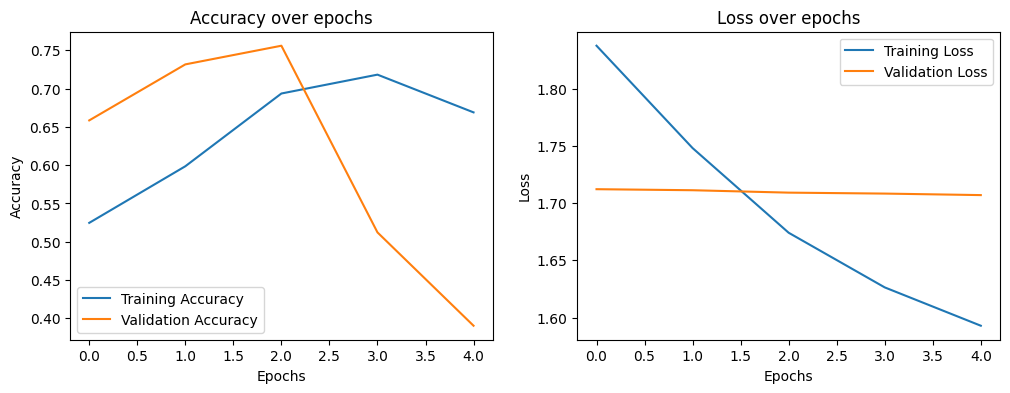

In [ ]:
# Plotting the best model's training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## VGG-16 Tuned

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16
import itertools
import matplotlib.pyplot as plt

# Creating a VGG16 model
def create_vgg16_model(input_shape=(224, 224, 3),
                       l2_regularizer=0.0001,
                       dropout_rate=0.5,
                       optimizer_type='adam',
                       learning_rate=1e-3):
    # Loading VGG16 base model
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    for layer in base_model.layers:
        layer.trainable = False

    # Custom classification head
    x = layers.Flatten()(base_model.output)
    x = layers.Dense(4096, activation='relu', kernel_regularizer=l2(l2_regularizer))(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(4096, activation='relu', kernel_regularizer=l2(l2_regularizer))(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(2, activation='sigmoid')(x)

    if optimizer_type == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_type == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    # Compiling the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Defining hyperparameters
learning_rates = [1e-5, 1e-3]
dropout_rates = [0.3, 0.5]
l2_regs = [0.0001, 0.001]
optimizers = ['adam', 'sgd']

best_accuracy = 0
best_model = None
best_params = None
best_history = None


for l2_reg, dropout, lr, opt_type in itertools.product(l2_regs, dropout_rates, learning_rates, optimizers):
    print(f"Training with: l2_reg={l2_reg}, dropout_rate={dropout}, learning_rate={lr}, optimizer={opt_type}")

    # Creating the model
    model = create_vgg16_model(
        l2_regularizer=l2_reg,
        dropout_rate=dropout,
        optimizer_type=opt_type,
        learning_rate=lr
    )

    # Training the model
    history = model.fit(
        combined_train_images, combined_train_labels,
        epochs=5,
        validation_data=(valid_images, valid_labels),
        verbose=0
    )

    # Getting the best validation accuracy
    val_accuracy = max(history.history['val_accuracy'])

    # Updating the best validation accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model = model
        best_params = (l2_reg, dropout, lr, opt_type)
        best_history = history

print(f"Best accuracy: {best_accuracy}")
print(f"Best parameters: l2_reg={best_params[0]}, dropout_rate={best_params[1]}, learning_rate={best_params[2]}, optimizer={best_params[3]}")

Training with: l2_reg=0.0001, dropout_rate=0.3, learning_rate=1e-05, optimizer=adam
Training with: l2_reg=0.0001, dropout_rate=0.3, learning_rate=1e-05, optimizer=sgd
Training with: l2_reg=0.0001, dropout_rate=0.3, learning_rate=0.001, optimizer=adam
Training with: l2_reg=0.0001, dropout_rate=0.3, learning_rate=0.001, optimizer=sgd
Training with: l2_reg=0.0001, dropout_rate=0.5, learning_rate=1e-05, optimizer=adam
Training with: l2_reg=0.0001, dropout_rate=0.5, learning_rate=1e-05, optimizer=sgd
Training with: l2_reg=0.0001, dropout_rate=0.5, learning_rate=0.001, optimizer=adam
Training with: l2_reg=0.0001, dropout_rate=0.5, learning_rate=0.001, optimizer=sgd
Training with: l2_reg=0.001, dropout_rate=0.3, learning_rate=1e-05, optimizer=adam
Training with: l2_reg=0.001, dropout_rate=0.3, learning_rate=1e-05, optimizer=sgd
Training with: l2_reg=0.001, dropout_rate=0.3, learning_rate=0.001, optimizer=adam
Training with: l2_reg=0.001, dropout_rate=0.3, learning_rate=0.001, optimizer=sgd
Tr

In [ ]:
# Model evaluation
test_loss, test_accuracy = best_model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 78ms/step - loss: 0.7809 - accuracy: 0.7500
Test Loss: 0.7808602452278137
Test Accuracy: 0.75


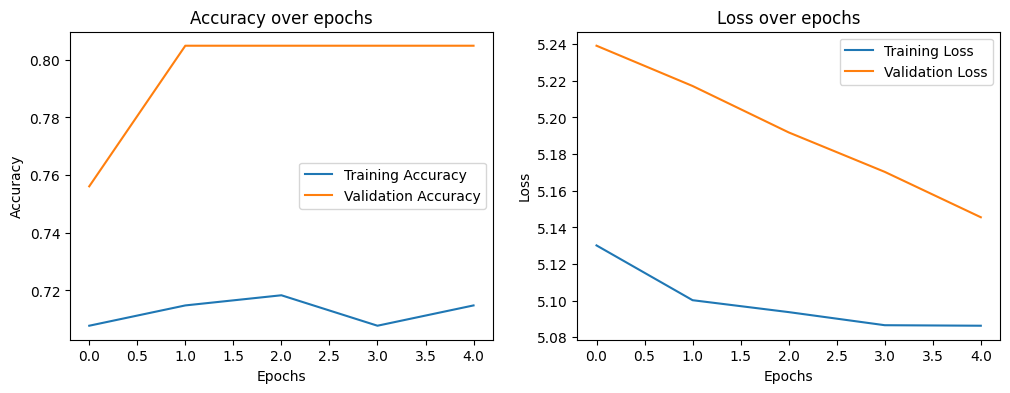

In [ ]:
# Plot the accuracy and loss for the best model
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()